In [236]:
from scipy.spatial import distance_matrix
import pandas as pd

In [237]:
data = pd.read_csv("/home/israel/Documentos/Programación/Machine Learning/python-ml-course-master/datasets/movies/movies.csv", sep = ";")

In [238]:
data

,user_id,star_wars,lord_of_the_rings,harry_potter
0,1,1.2,4.9,2.1
1,2,2.1,8.1,7.9
2,3,7.4,3.0,9.9
3,4,5.6,0.5,1.8
4,5,1.5,8.3,2.6
5,6,2.5,3.7,6.5
6,7,2.0,8.2,8.5
7,8,1.8,9.3,4.5
8,9,2.6,1.7,3.1
9,10,1.5,4.7,2.3


In [239]:
movies = data.columns.values.tolist()[1:]
movies # No nos interesa el user_id

['star_wars', 'lord_of_the_rings', 'harry_potter']

In [240]:
dd1 = distance_matrix(data[movies],data[movies],p=1)
dd2 = distance_matrix(data[movies],data[movies],p=2)
dd3 = distance_matrix(data[movies],data[movies],p=10)

In [241]:
dd1 # Siempre es recomendable pasarlo a DataFrame

array([[ 0. ,  9.9, 15.9,  9.1,  4.2,  6.9, 10.5,  7.4,  5.6,  0.7],
       [ 9.9,  0. , 12.4, 17.2,  6.1,  6.2,  0.8,  4.9, 11.7,  9.6],
       [15.9, 12.4,  0. , 12.4, 18.5,  9. , 12. , 17.3, 12.9, 15.2],
       [ 9.1, 17.2, 12.4,  0. , 12.7, 11. , 18. , 15.3,  5.5,  8.8],
       [ 4.2,  6.1, 18.5, 12.7,  0. ,  9.5,  6.5,  3.2,  8.2,  3.9],
       [ 6.9,  6.2,  9. , 11. ,  9.5,  0. ,  7. ,  8.3,  5.5,  6.2],
       [10.5,  0.8, 12. , 18. ,  6.5,  7. ,  0. ,  5.3, 12.5, 10.2],
       [ 7.4,  4.9, 17.3, 15.3,  3.2,  8.3,  5.3,  0. ,  9.8,  7.1],
       [ 5.6, 11.7, 12.9,  5.5,  8.2,  5.5, 12.5,  9.8,  0. ,  4.9],
       [ 0.7,  9.6, 15.2,  8.8,  3.9,  6.2, 10.2,  7.1,  4.9,  0. ]])

In [242]:
def dm_to_df(dd,col_name):
    import pandas as pd
    return pd.DataFrame(dd,index = col_name,columns = col_name)

In [243]:
dm_to_df(dd1,data['user_id'])

user_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
1,0.0,9.9,15.9,9.1,4.2,6.9,10.5,7.4,5.6,0.7
2,9.9,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6
3,15.9,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2
4,9.1,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8
5,4.2,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9
6,6.9,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2
7,10.5,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2
8,7.4,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1
9,5.6,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9


In [244]:
dm_to_df(dd2,data['user_id'])
dm_to_df(dd3,data['user_id'])

user_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
1,0.000000,5.801514,7.875189,4.715803,3.400000,4.400003,6.400850,4.401025,3.200085,0.301025
2,5.801514,0.000000,5.582463,7.680689,5.300000,4.400005,0.600000,3.400010,6.435159,5.603800
3,7.875189,5.582463,0.000000,8.100007,7.408914,4.912532,5.689450,6.570254,6.820602,7.658364
4,4.715803,7.680689,8.100007,0.000000,7.801255,4.717102,7.873307,8.800205,3.000101,4.450759
5,3.400000,5.300000,7.408914,7.801255,0.000000,4.681464,5.900000,1.900310,6.600000,3.600000
6,4.400003,4.400005,4.912532,4.717102,4.681464,0.000000,4.500135,5.600019,3.401683,4.200000
7,6.400850,0.600000,5.689450,7.873307,5.900000,4.500135,0.000000,4.000001,6.595259,6.202035
8,4.401025,3.400010,6.570254,8.800205,1.900310,5.600019,4.000001,0.000000,7.600000,4.600288
9,3.200085,6.435159,6.820602,3.000101,6.600000,3.401683,6.595259,7.600000,0.000000,3.000014


* para ver esto de forma visual podemos usar una libreria de representación gráfica (3d)


In [245]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

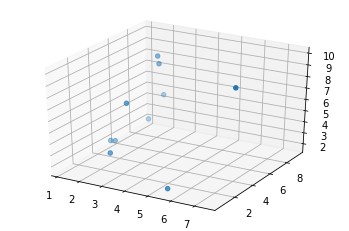

In [246]:
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')  # El 111 genera una figura donde los tres ejes van de cero a auno
ax.scatter(xs = data['star_wars'], ys = data['lord_of_the_rings'], zs = data['harry_potter'])

## Enlaces

In [247]:
# tomaremos la matriz con la distancia manhatan

In [248]:
df = dm_to_df(dd1,data["user_id"])
df

user_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
1,0.0,9.9,15.9,9.1,4.2,6.9,10.5,7.4,5.6,0.7
2,9.9,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6
3,15.9,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2
4,9.1,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8
5,4.2,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9
6,6.9,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2
7,10.5,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2
8,7.4,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1
9,5.6,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9


In [249]:
# Primero haremos el Clustering de manera manual, y luego veremos como implmentarlo directamente con python

In [250]:
#consideremos una matriz z vacia

z = []
df.loc[1]+df.loc[10]

user_id
1      0.7
2     19.5
3     31.1
4     17.9
5      8.1
6     13.1
7     20.7
8     14.5
9     10.5
10     0.7
dtype: float64

In [251]:
# primero hay que determinar la distancia mas pequeña dentro de la matriz, al ojo podemos ver que 0,7 es la 
#distancia mas pequeña, luego definimo en el data frame una nueva columna donde uniremos 1 con 10

df[11] = df[1]+df[10]
df.loc[11] = df.loc[1]+df.loc[10]
z.append([1,10,0.7,2]) # id1,id2,distancia,n_elementos_en_cluster --> 11
df

user_id,1,2,3,4,5,6,7,8,9,10,11
user_id,,,,,,,,,,,
1,0.0,9.9,15.9,9.1,4.2,6.9,10.5,7.4,5.6,0.7,0.7
2,9.9,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6,19.5
3,15.9,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2,31.1
4,9.1,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8,17.9
5,4.2,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9,8.1
6,6.9,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2,13.1
7,10.5,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2,20.7
8,7.4,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1,14.5
9,5.6,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9,10.5


In [252]:
for i in df.columns.values.tolist():
    df.loc[11][i] = min(df.loc[1][i],df.loc[10][i])
    df.loc[i][11] = min(df.loc[i][1],df.loc[i][10])
df

user_id,1,2,3,4,5,6,7,8,9,10,11
user_id,,,,,,,,,,,
1,0.0,9.9,15.9,9.1,4.2,6.9,10.5,7.4,5.6,0.7,0.0
2,9.9,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6,9.6
3,15.9,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2,15.2
4,9.1,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8,8.8
5,4.2,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9,3.9
6,6.9,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2,6.2
7,10.5,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2,10.2
8,7.4,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1,7.1
9,5.6,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9,4.9


In [253]:
df = df.drop([1,10])
df = df.drop([1,10], axis = 1)

In [254]:
df

user_id,2,3,4,5,6,7,8,9,11
user_id,,,,,,,,,
2,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6
3,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2
4,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8
5,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9
6,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2
7,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2
8,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1
9,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9
11,9.6,15.2,8.8,3.9,6.2,10.2,7.1,4.9,0.0


In [255]:
# Volvermos a repetir el mismo procedimiento, notemos el 0.8 entre 2y 7

x = 2
y = 7

n=12

df[n] = df[x]+df[y]
df.loc[n] = df.loc[x]+df.loc[y]
z.append([x,y,df.loc[x][y],2]) # id1,id2,distancia,n_elementos_en_cluster --> 11
df

for i in df.columns.values.tolist():
    df.loc[n][i] = min(df.loc[x][i],df.loc[y][i])
    df.loc[i][n] = min(df.loc[i][x],df.loc[i][y])
df

df = df.drop([x,y])
df = df.drop([x,y], axis = 1)

In [256]:
df

user_id,3,4,5,6,8,9,11,12
user_id,,,,,,,,
3,0.0,12.4,18.5,9.0,17.3,12.9,15.2,12.0
4,12.4,0.0,12.7,11.0,15.3,5.5,8.8,17.2
5,18.5,12.7,0.0,9.5,3.2,8.2,3.9,6.1
6,9.0,11.0,9.5,0.0,8.3,5.5,6.2,6.2
8,17.3,15.3,3.2,8.3,0.0,9.8,7.1,4.9
9,12.9,5.5,8.2,5.5,9.8,0.0,4.9,11.7
11,15.2,8.8,3.9,6.2,7.1,4.9,0.0,9.6
12,12.0,17.2,6.1,6.2,4.9,11.7,9.6,0.0


In [257]:
z

[[1, 10, 0.7, 2], [2, 7, 0.7999999999999994, 2]]

In [258]:
# Repetimos
x = 5
y = 8

n=13

df[n] = df[x]+df[y]
df.loc[n] = df.loc[x]+df.loc[y]
z.append([x,y,df.loc[x][y],2]) # id1,id2,distancia,n_elementos_en_cluster --> 11
df

for i in df.columns.values.tolist():
    df.loc[n][i] = min(df.loc[x][i],df.loc[y][i])
    df.loc[i][n] = min(df.loc[i][x],df.loc[i][y])
df

df = df.drop([x,y])
df = df.drop([x,y], axis = 1)

In [259]:
df

user_id,3,4,6,9,11,12,13
user_id,,,,,,,
3,0.0,12.4,9.0,12.9,15.2,12.0,17.3
4,12.4,0.0,11.0,5.5,8.8,17.2,12.7
6,9.0,11.0,0.0,5.5,6.2,6.2,8.3
9,12.9,5.5,5.5,0.0,4.9,11.7,8.2
11,15.2,8.8,6.2,4.9,0.0,9.6,3.9
12,12.0,17.2,6.2,11.7,9.6,0.0,4.9
13,17.3,12.7,8.3,8.2,3.9,4.9,0.0


In [260]:
x = 11
y = 13

n=14

df[n] = df[x]+df[y]
df.loc[n] = df.loc[x]+df.loc[y]
z.append([x,y,df.loc[x][y],2]) # id1,id2,distancia,n_elementos_en_cluster --> 11
df

for i in df.columns.values.tolist():
    df.loc[n][i] = min(df.loc[x][i],df.loc[y][i])
    df.loc[i][n] = min(df.loc[i][x],df.loc[i][y])
df

df = df.drop([x,y])
df = df.drop([x,y], axis = 1)

In [261]:
df

user_id,3,4,6,9,12,14
user_id,,,,,,
3,0.0,12.4,9.0,12.9,12.0,15.2
4,12.4,0.0,11.0,5.5,17.2,8.8
6,9.0,11.0,0.0,5.5,6.2,6.2
9,12.9,5.5,5.5,0.0,11.7,4.9
12,12.0,17.2,6.2,11.7,0.0,4.9
14,15.2,8.8,6.2,4.9,4.9,0.0


In [262]:
# OJO AQUI, tenemos tres 4,9, aií que debemos juntar tres elementos
x = 9
y = 12
z1= 14  # Lo llamamos z1 ya que ya hemos lllamado z matriz

n=15

df[n] = df[x]+df[y]
df.loc[n] = df.loc[x]+df.loc[y]
z.append([x,y,z1,df.loc[y][z1],3]) # id1,id2,distancia,n_elementos_en_cluster --> 11


for i in df.columns.values.tolist():
    df.loc[n][i] = min(df.loc[x][i], df.loc[y][i], df.loc[z1][i])
    df.loc[i][n] = min(df.loc[i][x], df.loc[i][y], df.loc[i][z1])


df = df.drop([x,y,z1])
df = df.drop([x,y,z1], axis = 1)

In [263]:
df

user_id,3,4,6,15
user_id,,,,
3,0.0,12.4,9.0,12.0
4,12.4,0.0,11.0,5.5
6,9.0,11.0,0.0,5.5
15,12.0,5.5,5.5,0.0


In [264]:
# Nuevamente tenemos un cluster con tres elementos

x = 4
y = 6
z1= 15  # Lo llamamos z1 ya que ya hemos lllamado z matriz

n=16

df[n] = df[x]+df[y]
df.loc[n] = df.loc[x]+df.loc[y]
z.append([x,y,z1,df.loc[y][z1],3]) # id1,id2,distancia,n_elementos_en_cluster --> 11


for i in df.columns.values.tolist():
    df.loc[n][i] = min(df.loc[x][i], df.loc[y][i], df.loc[z1][i])
    df.loc[i][n] = min(df.loc[i][x], df.loc[i][y], df.loc[i][z1])


df = df.drop([x,y,z1])
df = df.drop([x,y,z1], axis = 1)

In [265]:
df

user_id,3,16
user_id,,
3,0.0,9.0
16,9.0,0.0


In [266]:
x = 3
y = 16

n=17

df[n] = df[x]+df[y]
df.loc[n] = df.loc[x]+df.loc[y]
z.append([x,y,df.loc[x][y],2]) # id1,id2,distancia,n_elementos_en_cluster --> 11
df

for i in df.columns.values.tolist():
    df.loc[n][i] = min(df.loc[x][i],df.loc[y][i])
    df.loc[i][n] = min(df.loc[i][x],df.loc[i][y])
df

df = df.drop([x,y])
df = df.drop([x,y], axis = 1)

In [267]:
df

user_id,17
user_id,
17,0.0


In [268]:
z

[[1, 10, 0.7, 2],
 [2, 7, 0.7999999999999994, 2],
 [5, 8, 3.2, 2],
 [11, 13, 3.900000000000001, 2],
 [9, 12, 14, 4.900000000000001, 3],
 [4, 6, 15, 5.5, 3],
 [3, 16, 9.0, 2]]

## Clustering jerárquico utilizando librerias

In [270]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [271]:
movies 

['star_wars', 'lord_of_the_rings', 'harry_potter']

In [272]:
data[movies]

,star_wars,lord_of_the_rings,harry_potter
0,1.2,4.9,2.1
1,2.1,8.1,7.9
2,7.4,3.0,9.9
3,5.6,0.5,1.8
4,1.5,8.3,2.6
5,2.5,3.7,6.5
6,2.0,8.2,8.5
7,1.8,9.3,4.5
8,2.6,1.7,3.1
9,1.5,4.7,2.3


In [273]:
# LA función linkage nos calcula el enlace con el data frame que le demos y con el metodo que le digamos

In [274]:
z = linkage(data[movies],'ward') # para ver mas información sobre esta función y sus parametros buscar 
#Linkage python en google
z

array([[ 0.        ,  9.        ,  0.41231056,  2.        ],
       [ 1.        ,  6.        ,  0.6164414 ,  2.        ],
       [ 4.        ,  7.        ,  2.16794834,  2.        ],
       [ 3.        ,  8.        ,  3.48281495,  2.        ],
       [ 5.        , 10.        ,  5.2943366 ,  3.        ],
       [13.        , 14.        ,  6.59317829,  5.        ],
       [11.        , 12.        ,  6.66408283,  4.        ],
       [ 2.        , 15.        , 10.62355873,  6.        ],
       [16.        , 17.        , 12.8156935 , 10.        ]])

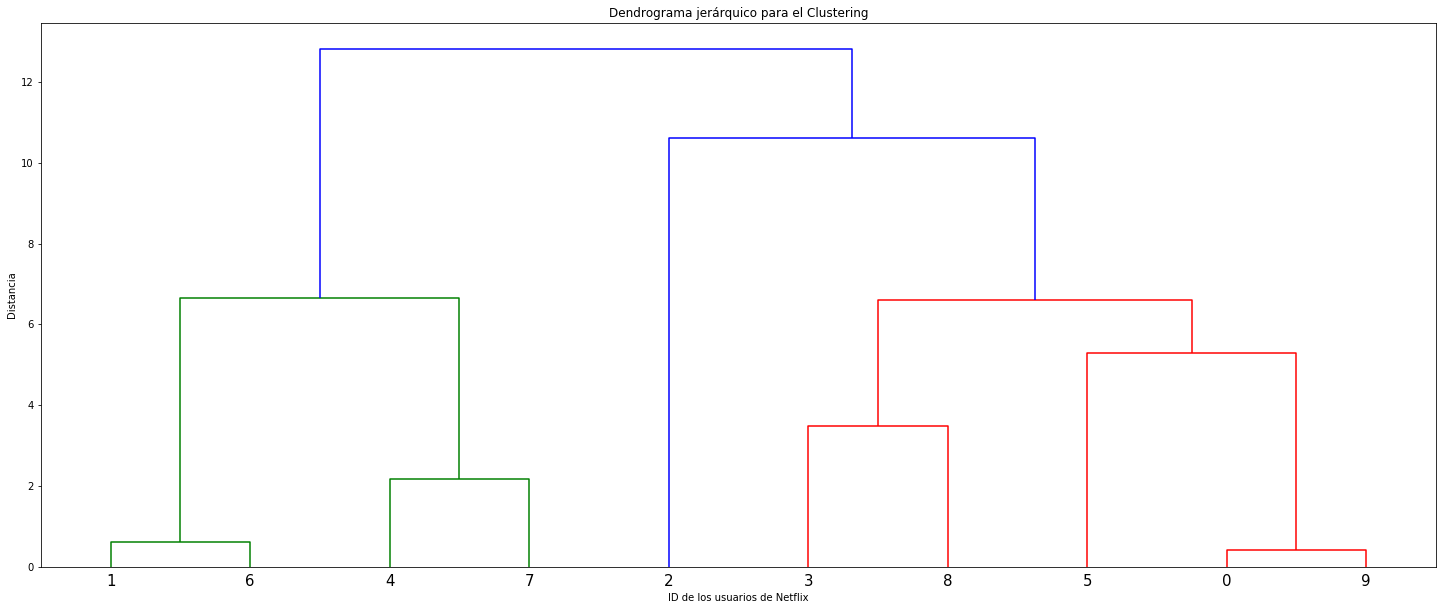

In [280]:
plt.figure(figsize =(25,10))
plt.title("Dendrograma jerárquico para el Clustering")
plt.xlabel("ID de los usuarios de Netflix")
plt.ylabel("Distancia")
dendrogram(z, leaf_font_size = 15)
plt.show()

In [281]:
# Veamos como resulta con otro tipo de enlace, por ejemplo "average"

In [282]:
z = linkage(data[movies], 'average')

In [283]:
z

array([[ 0.        ,  9.        ,  0.41231056,  2.        ],
       [ 1.        ,  6.        ,  0.6164414 ,  2.        ],
       [ 4.        ,  7.        ,  2.16794834,  2.        ],
       [ 8.        , 10.        ,  3.46355712,  3.        ],
       [ 5.        , 13.        ,  4.37331672,  4.        ],
       [11.        , 12.        ,  4.75772945,  4.        ],
       [ 3.        , 14.        ,  5.51984068,  5.        ],
       [15.        , 16.        ,  6.87496749,  9.        ],
       [ 2.        , 17.        ,  8.78305268, 10.        ]])

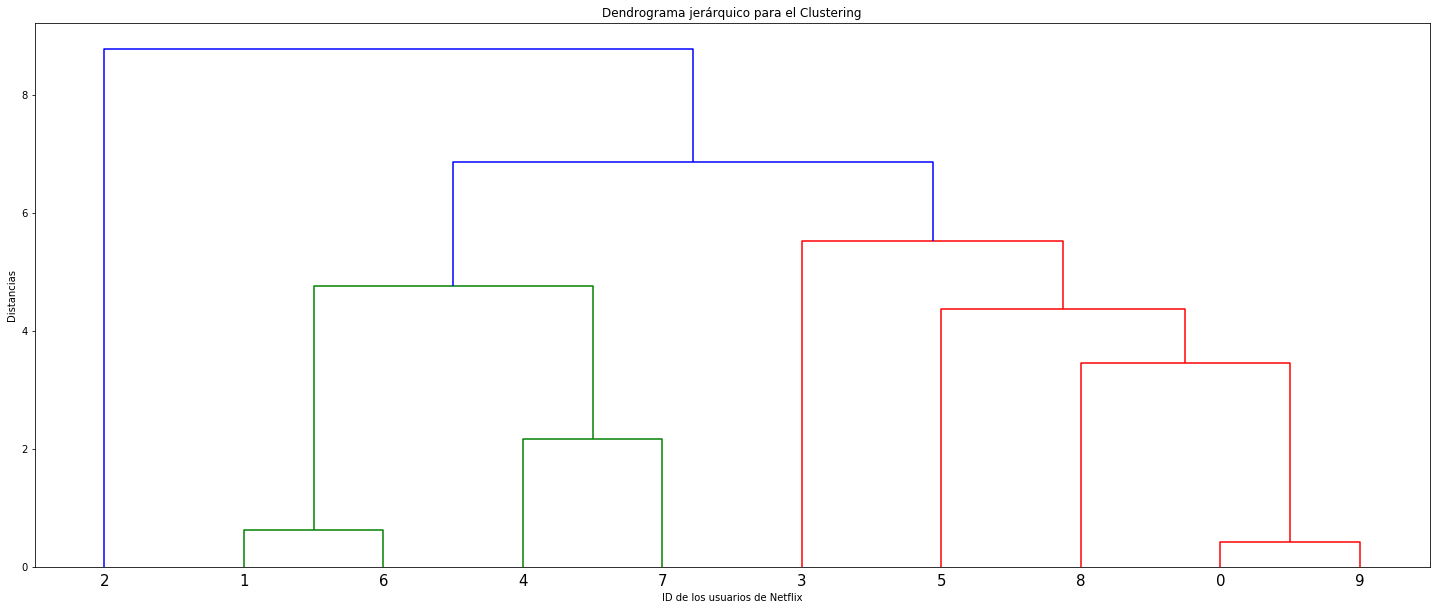

In [284]:
plt.figure(figsize = (25,10))
plt.title('Dendrograma jerárquico para el Clustering')
plt.xlabel("ID de los usuarios de Netflix")
plt.ylabel("Distancias")
dendrogram(z,leaf_font_size = 15)
plt.show()

In [285]:
# Los clusters internos reflejan la misma información, pero la zona roja cambia un poco su distribución,
# Mientras que el 2 sigue siendo el mas alejado

In [286]:
data[movies] # Notemos que el 2 en efecto es muy atipico, muy bajo al señor de los anillos y un 9,9 para star
#wars

,star_wars,lord_of_the_rings,harry_potter
0,1.2,4.9,2.1
1,2.1,8.1,7.9
2,7.4,3.0,9.9
3,5.6,0.5,1.8
4,1.5,8.3,2.6
5,2.5,3.7,6.5
6,2.0,8.2,8.5
7,1.8,9.3,4.5
8,2.6,1.7,3.1
9,1.5,4.7,2.3
